In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data processing

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Machine LEarning/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
# Check the distribution of target class as mostly credit card fraud rate is tiny
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
df.shape

(284807, 31)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6beb892d0>,
      dtype=object)

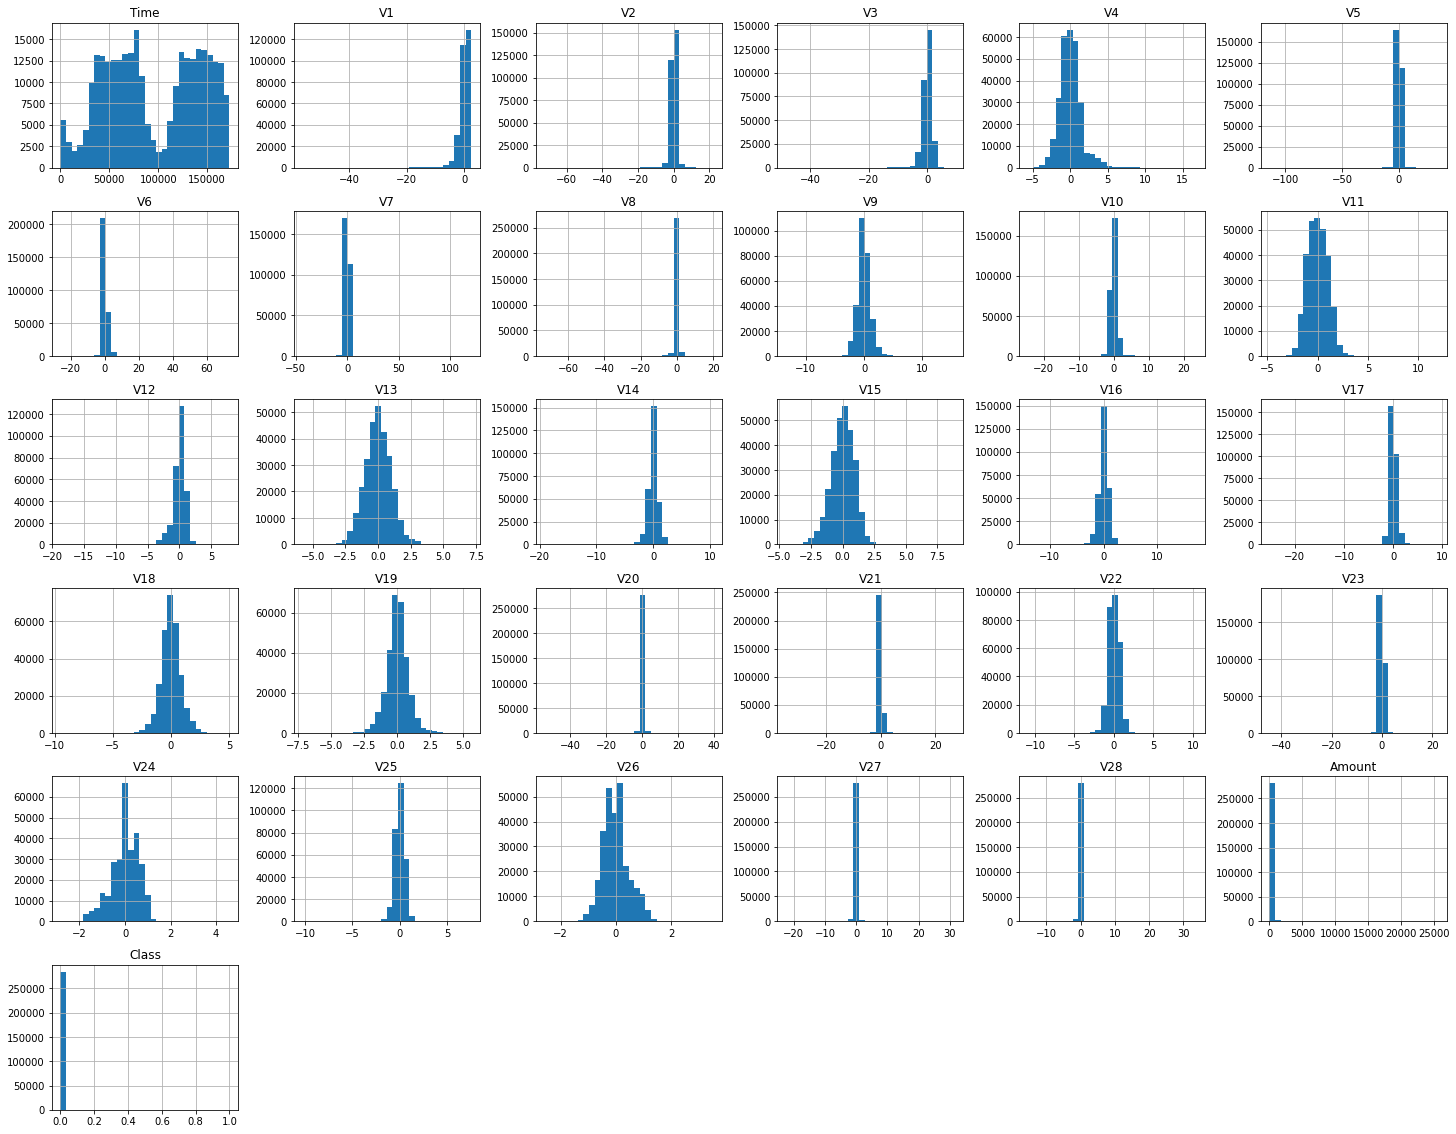

In [12]:
# Check the data distribution
df.hist(bins=30, figsize=(25, 20))

In [13]:
from sklearn.preprocessing import MinMaxScaler
# All fields are numeric but the scalers vary, some algorithms are sensitive to scale, while some are not, so experiments are necesary. First make a copy of scaled dataframe

scaler = MinMaxScaler()

X = df.drop("Class", axis=1)
y = df["Class"]

# Deep copy by default
scaled = scaler.fit_transform(X)

In [14]:
df_scaled = pd.DataFrame(scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6a8faeb50>,
      dtype=object)

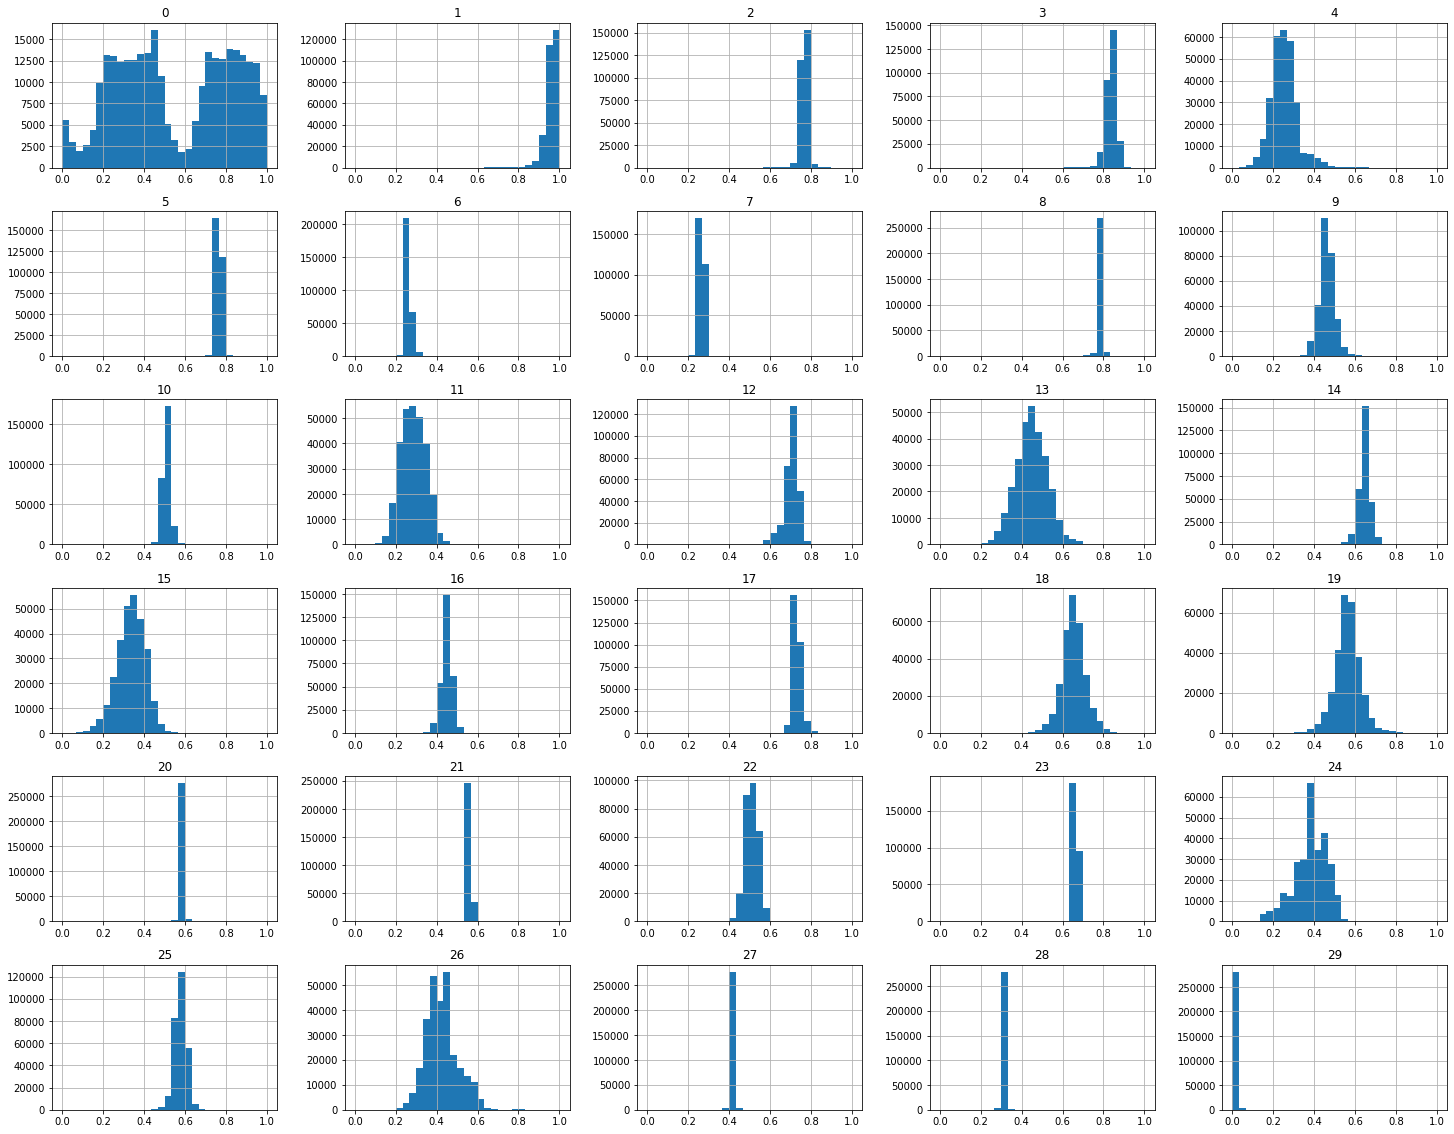

In [15]:
# Check the distribution after scaling
df_scaled.hist(bins=30, figsize=(25, 20))

# Split data into train/validation/test set

In [16]:
from sklearn.model_selection import train_test_split

test_size = 0.2
seed = 42

X_train, X_valid, y_train, y_valid = train_test_split(
    scaled, y, test_size=test_size, random_state=seed)

# Modeling Experiments with H2O

In [20]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmplmu1uekh
  JVM stdout: /tmp/tmplmu1uekh/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmplmu1uekh/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_unknownUser_gft9pi
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [19]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 177.0 MB 52 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.2-py2.py3-none-any.whl size=177070945 sha256=40334290d7e715bd17745b19c1ba7775b7f1bce31b907d13aa05385a1881590f
  Stored in directory: /root/.cache/pip/wheels/a5/2b/ae/534595df09001e1573b1046be62a3f049507307340119db65c
Successfully built h2o


In [21]:
# Construct the h2o data frame and split the data into train/valid/test set
X_frame = h2o.H2OFrame(scaled)
y_frame = h2o.H2OFrame(np.array(y))

h2o_df = X_frame.cbind(y_frame)

train_frame, valid_frame, test_frame = h2o_df.split_frame(
    ratios=[0.6,0.2], 
    seed=1234, 
    destination_frames=['train_frame.hex','valid_frame.hex','test_frame.hex']
)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [22]:
# Check the lable distribution of each set
print(f"Fraud ratio of training set: {100*train_frame['C110'].table()[1,1]/train_frame['C110'].table()[1].sum()}%")

print(f"Fraud ratio of validation set: {100*valid_frame['C110'].table()[1,1]/valid_frame['C110'].table()[1].sum()}%")

print(f"Fraud ratio of test set: {100*test_frame['C110'].table()[1,1]/test_frame['C110'].table()[1].sum()}%")

Fraud ratio of training set: 0.16356955503239262%
Fraud ratio of validation set: 0.19155068185013355%
Fraud ratio of test set: 0.18158739113571454%


In [23]:
train_frame.head(5)

C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C110
0,0.978542,0.770067,0.840298,0.271796,0.76612,0.262192,0.264875,0.786298,0.453981,0.505267,0.381188,0.744342,0.48619,0.641219,0.38384,0.464105,0.727794,0.640681,0.55193,0.57953,0.55784,0.480237,0.666938,0.33644,0.58729,0.446013,0.416345,0.313423,0.000104705,0
1.15746e-05,0.938617,0.77652,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.49095,0.524303,0.236355,0.724477,0.552509,0.608406,0.349419,0.434995,0.724243,0.650665,0.62606,0.584615,0.561327,0.547271,0.663392,0.40127,0.566343,0.507497,0.420561,0.31749,0.00272428,0
1.15746e-05,0.951057,0.777393,0.857187,0.244472,0.76855,0.262721,0.268257,0.788178,0.44319,0.501038,0.365045,0.717757,0.420612,0.641442,0.375023,0.462127,0.729441,0.658014,0.560723,0.58117,0.558122,0.483915,0.665042,0.332185,0.564839,0.442749,0.421196,0.314769,0.000142851,0
2.31492e-05,0.979184,0.768746,0.8382,0.305241,0.767008,0.265762,0.265324,0.786257,0.478797,0.506668,0.201028,0.698395,0.390194,0.651681,0.340076,0.435245,0.731212,0.611202,0.559756,0.577927,0.558776,0.497402,0.663145,0.277122,0.620014,0.383429,0.417148,0.313229,0.00019423,0
4.05111e-05,0.947348,0.78222,0.856031,0.230111,0.772104,0.267324,0.272183,0.744539,0.483978,0.534571,0.248448,0.715178,0.584409,0.60154,0.38762,0.446931,0.69562,0.628655,0.588656,0.578596,0.592809,0.46266,0.666288,0.294686,0.554597,0.417014,0.394234,0.291099,0.00158809,0


In [24]:
# set the target variable to be categorical
h2o_df["C110"] = h2o_df["C110"].asfactor()
train_frame["C110"] = train_frame["C110"].asfactor()
valid_frame["C110"] = valid_frame["C110"].asfactor()
test_frame["C110"] = test_frame["C110"].asfactor()

In [25]:
predictors = train_frame.columns[:-1]
response = train_frame.columns[-1]

print(f"Modeling experiments on fields: {predictors} -> predict the target: {response}")

Modeling experiments on fields: ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30'] -> predict the target: C110


# XGBoost

Please note that in the prior version, other models like random forest, GBM have been tested an their overall performance is not as good as XGBoost, so in this version, the focus is to improve the XGBoost model and push the accuracy to the limit.

In [26]:
from h2o.estimators import H2OXGBoostEstimator

# Build and train the model:
xgb = H2OXGBoostEstimator(booster='dart',
                                  normalize_type="tree",
                                  seed=1234)

xgb.train(x=predictors,
               y=response,
               training_frame=train_frame,
               validation_frame=valid_frame)

xgboost Model Build progress: |██████████████████████████████████████████████████| (done) 100%
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1654666896785_1


Model Summary: 


,,number_of_trees
0,,50.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 1.5091104186364507e-05
RMSE: 0.003884727041423182
LogLoss: 0.0001447542247076061
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37180227041244507: 


,,0,1,Error,Rate
0,0,170901.0,0.0,0.0,(0.0/170901.0)
1,1,0.0,280.0,0.0,(0.0/280.0)
2,Total,170901.0,280.0,0.0,(0.0/171181.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.371802,1.000000,148.0
1,max f2,0.371802,1.000000,148.0
2,max f0point5,0.371802,1.000000,148.0
3,max accuracy,0.371802,1.000000,148.0
4,max precision,0.999821,1.000000,0.0
5,max recall,0.371802,1.000000,148.0
6,max specificity,0.999821,1.000000,0.0
7,max absolute_mcc,0.371802,1.000000,148.0
8,max min_per_class_accuracy,0.371802,1.000000,148.0
9,max mean_per_class_accuracy,0.371802,1.000000,148.0



Gains/Lift Table: Avg response rate:  0.16 %, avg score:  0.16 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010001,9.079146e-04,99.988902,99.988902,0.163551,0.161041,0.163551,0.161041,1.0,1.0,9898.890187,9898.890187,0.991621
1,2,0.020002,4.032103e-04,0.000000,49.994451,0.000000,0.000589,0.081776,0.080815,0.0,1.0,-100.000000,4899.445093,0.981603
2,3,0.030003,2.529439e-04,0.000000,33.329634,0.000000,0.000317,0.054517,0.053983,0.0,1.0,-100.000000,3232.963396,0.971586
3,4,0.040004,1.824252e-04,0.000000,24.997225,0.000000,0.000215,0.040888,0.040541,0.0,1.0,-100.000000,2399.722547,0.961568
4,5,0.050093,1.413069e-04,0.000000,19.962799,0.000000,0.000160,0.032653,0.032408,0.0,1.0,-100.000000,1896.279883,0.951463
5,6,0.100011,6.754103e-05,0.000000,9.998890,0.000000,0.000096,0.016355,0.016280,0.0,1.0,-100.000000,899.889019,0.901463
6,7,0.150005,4.260820e-05,0.000000,6.666446,0.000000,0.000053,0.010904,0.010872,0.0,1.0,-100.000000,566.644598,0.851388
7,8,0.200005,3.049813e-05,0.000000,4.999883,0.000000,0.000036,0.008178,0.008163,0.0,1.0,-100.000000,399.988317,0.801306
8,9,0.300004,1.865484e-05,0.000000,3.333288,0.000000,0.000024,0.005452,0.005450,0.0,1.0,-100.000000,233.328790,0.701143
9,10,0.400004,1.283813e-05,0.000000,2.499978,0.000000,0.000015,0.004089,0.004091,0.0,1.0,-100.000000,149.997809,0.600980




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.000527516644923336
RMSE: 0.022967730513120708
LogLoss: 0.003496363546981698
Mean Per-Class Error: 0.11016217185418992
AUC: 0.9777084169607255
AUCPR: 0.8401450244666461
Gini: 0.955416833921451

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4370211064815521: 


,,0,1,Error,Rate
0,0,56787.0,8.0,0.0001,(8.0/56795.0)
1,1,24.0,85.0,0.2202,(24.0/109.0)
2,Total,56811.0,93.0,0.0006,(32.0/56904.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.437021,0.841584,81.0
1,max f2,0.039377,0.821033,94.0
2,max f0point5,0.951279,0.910224,61.0
3,max accuracy,0.437021,0.999438,81.0
4,max precision,0.999821,1.000000,0.0
5,max recall,0.000009,1.000000,389.0
6,max specificity,0.999821,1.000000,0.0
7,max absolute_mcc,0.437021,0.843965,81.0
8,max min_per_class_accuracy,0.000142,0.926606,341.0
9,max mean_per_class_accuracy,0.000142,0.938230,341.0



Gains/Lift Table: Avg response rate:  0.19 %, avg score:  0.16 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010017,9.080466e-04,87.925060,87.925060,0.168421,0.161092,0.168421,0.161092,0.880734,0.880734,8692.506036,8692.506036,0.872388
1,2,0.020016,4.072006e-04,0.917496,44.459473,0.001757,0.000601,0.085162,0.080917,0.009174,0.889908,-8.250431,4345.947274,0.871562
2,3,0.030015,2.598949e-04,0.000000,29.648325,0.000000,0.000323,0.056792,0.054068,0.000000,0.889908,-100.000000,2864.832520,0.861543
3,4,0.040015,1.861302e-04,0.917496,22.468772,0.001757,0.000219,0.043039,0.040612,0.009174,0.899083,-8.250431,2146.877229,0.860717
4,5,0.050014,1.443752e-04,1.834991,18.343466,0.003515,0.000163,0.035137,0.032525,0.018349,0.917431,83.499137,1734.346612,0.869082
5,6,0.100011,6.751764e-05,0.366998,9.356812,0.000703,0.000097,0.017923,0.016314,0.018349,0.935780,-63.300173,835.681158,0.837373
6,7,0.150007,4.276151e-05,0.000000,6.238240,0.000000,0.000053,0.011949,0.010894,0.000000,0.935780,-100.000000,523.823977,0.787281
7,8,0.200004,3.055724e-05,0.366998,4.770558,0.000703,0.000036,0.009138,0.008180,0.018349,0.954128,-63.300173,377.055837,0.755572
8,9,0.299996,1.882904e-05,0.091750,3.211047,0.000176,0.000024,0.006151,0.005461,0.009174,0.963303,-90.825043,221.104679,0.664579
9,10,0.400007,1.284450e-05,0.183467,2.454085,0.000351,0.000016,0.004701,0.004100,0.018349,0.981651,-81.653311,145.408531,0.582761




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-06-08 05:42:22,0.468 sec,0.0,0.500000,0.693147,0.500000,0.001636,1.000000,0.998364,0.500000,0.693147,0.500000,0.001916,1.00000,0.998084
1,,2022-06-08 05:42:23,1.763 sec,1.0,0.354654,0.437951,0.901505,0.786898,1.000000,0.000450,0.354752,0.438095,0.894098,0.710284,1.00000,0.000633
2,,2022-06-08 05:42:24,2.249 sec,2.0,0.256968,0.296929,0.930013,0.844463,1.000000,0.000374,0.257201,0.297190,0.907715,0.757524,1.00000,0.000597
3,,2022-06-08 05:42:24,2.600 sec,3.0,0.188026,0.208075,0.930022,0.854881,1.000000,0.000315,0.188418,0.208416,0.907736,0.788299,1.00000,0.000580
4,,2022-06-08 05:42:24,2.989 sec,4.0,0.138454,0.148631,0.930025,0.857631,1.000000,0.000280,0.139081,0.149062,0.907736,0.788065,1.00000,0.000527
5,,2022-06-08 05:42:25,3.415 sec,5.0,0.102548,0.107519,0.930027,0.859334,1.000000,0.000275,0.103497,0.108034,0.907737,0.788110,1.00000,0.000527
6,,2022-06-08 05:42:25,3.733 sec,6.0,0.076454,0.078480,0.930028,0.860372,1.000000,0.000257,0.077853,0.079077,0.907741,0.793024,1.00000,0.000527
7,,2022-06-08 05:42:25,4.070 sec,7.0,0.057541,0.057690,0.930029,0.860783,1.000000,0.000251,0.059507,0.058364,0.907738,0.790365,1.00000,0.000527
8,,2022-06-08 05:42:26,4.360 sec,8.0,0.043906,0.042661,0.930030,0.861213,1.000000,0.000245,0.046491,0.043376,0.907743,0.794578,1.00000,0.000527
9,,2022-06-08 05:42:26,4.679 sec,9.0,0.034231,0.031727,0.937006,0.869693,1.000000,0.000245,0.037616,0.032510,0.912029,0.797066,1.00000,0.000545



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C15,1112.570068,1.000000,0.270798
1,C13,645.762634,0.580424,0.157178
2,C11,612.591614,0.550609,0.149104
3,C5,208.994461,0.187848,0.050869
4,C8,200.719666,0.180411,0.048855
5,C27,104.909416,0.094295,0.025535
6,C1,92.442627,0.083089,0.022500
7,C6,81.395004,0.073159,0.019811
8,C30,79.471680,0.071431,0.019343
9,C17,69.626106,0.062581,0.016947



See the whole table with table.as_data_frame()


In [27]:
xgb_perf = xgb.model_performance(test_frame)
print(f"F1 score of the XGBoost: {xgb_perf.F1()}")
print(f"AUC of the XGBoost: {xgb_perf.auc()}")

xgb_perf

F1 score of the XGBoost: [[0.12654709815979004, 0.864321608040201]]
AUC of the XGBoost: 0.9771902361501003

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.000457876507155303
RMSE: 0.021398049143679033
LogLoss: 0.003229756411923984
Mean Per-Class Error: 0.08261258142271703
AUC: 0.9771902361501003
AUCPR: 0.8309562318730896
Gini: 0.9543804723002005

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.12654709815979004: 


,,0,1,Error,Rate
0,0,56609.0,10.0,0.0002,(10.0/56619.0)
1,1,17.0,86.0,0.165,(17.0/103.0)
2,Total,56626.0,96.0,0.0005,(27.0/56722.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.126547,0.864322,80.0
1,max f2,0.126547,0.846457,80.0
2,max f0point5,0.947154,0.903614,62.0
3,max accuracy,0.126547,0.999524,80.0
4,max precision,0.999526,1.000000,0.0
5,max recall,0.000007,1.000000,391.0
6,max specificity,0.999526,1.000000,0.0
7,max absolute_mcc,0.126547,0.864620,80.0
8,max min_per_class_accuracy,0.000091,0.923224,349.0
9,max mean_per_class_accuracy,0.000357,0.945767,300.0



Gains/Lift Table: Avg response rate:  0.18 %, avg score:  0.16 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010014,8.869696e-04,85.319568,85.319568,0.154930,0.160620,0.154930,0.160620,0.854369,0.854369,8431.956789,8431.956789,0.845891
1,2,0.020010,3.977876e-04,4.856252,45.123357,0.008818,0.000579,0.081938,0.080670,0.048544,0.902913,385.625246,4412.335657,0.884509
2,3,0.030006,2.603984e-04,0.971250,30.414635,0.001764,0.000324,0.055229,0.053903,0.009709,0.912621,-2.874951,2941.463498,0.884221
3,4,0.040002,1.872303e-04,0.971250,23.057033,0.001764,0.000220,0.041869,0.040488,0.009709,0.922330,-2.874951,2205.703295,0.883933
4,5,0.050016,1.442712e-04,0.000000,18.440750,0.000000,0.000164,0.033486,0.032415,0.000000,0.922330,-100.000000,1744.075001,0.873901
5,6,0.100014,6.869495e-05,0.388363,9.416148,0.000705,0.000098,0.017099,0.016259,0.019417,0.941748,-61.163679,841.614769,0.843265
6,7,0.150012,4.273174e-05,0.000000,6.277801,0.000000,0.000054,0.011400,0.010858,0.000000,0.941748,-100.000000,527.780066,0.793176
7,8,0.200011,3.054378e-05,0.194182,4.757030,0.000353,0.000036,0.008638,0.008153,0.009709,0.951456,-80.581840,375.702996,0.752813
8,9,0.300007,1.881588e-05,0.194182,3.236170,0.000353,0.000024,0.005876,0.005443,0.019417,0.970874,-80.581840,223.616988,0.672087
9,10,0.400004,1.295593e-05,0.097091,2.451435,0.000176,0.000016,0.004451,0.004086,0.009709,0.980583,-90.290920,145.143470,0.581635


### Cross-validation of XGBoost

In [28]:
xgb_cv = H2OXGBoostEstimator(booster='dart',
                                  normalize_type="tree",
                                  seed=1234,
                            nfolds = 5)

# During cross-validation, the train set and validation set are combined together in order to get more data in training
xgb_cv.train(x=predictors,
               y=response,
               training_frame=train_frame.rbind(valid_frame)
               )

xgboost Model Build progress: |██████████████████████████████████████████████████| (done) 100%
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1654666896785_27


Model Summary: 


,,number_of_trees
0,,50.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 1.977933188658545e-05
RMSE: 0.004447396079346368
LogLoss: 0.000170491933846105
Mean Per-Class Error: 0.0012853470437017994
AUC: 0.9999997854894787
AUCPR: 0.999880139356633
Gini: 0.9999995709789573

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33718541264533997: 


,,0,1,Error,Rate
0,0,227696.0,0.0,0.0,(0.0/227696.0)
1,1,1.0,388.0,0.0026,(1.0/389.0)
2,Total,227697.0,388.0,0.0,(1.0/228085.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.337185,0.998713,162.0
1,max f2,0.337185,0.997942,162.0
2,max f0point5,0.337185,0.999485,162.0
3,max accuracy,0.337185,0.999996,162.0
4,max precision,0.999824,1.000000,0.0
5,max recall,0.061726,1.000000,180.0
6,max specificity,0.999824,1.000000,0.0
7,max absolute_mcc,0.337185,0.998712,162.0
8,max min_per_class_accuracy,0.061726,0.999917,180.0
9,max mean_per_class_accuracy,0.061726,0.999958,180.0



Gains/Lift Table: Avg response rate:  0.17 %, avg score:  0.17 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010001,1.099293e-03,99.993424,99.993424,0.170539,0.167402,0.170539,0.167402,1.0,1.0,9899.342394,9899.342394,0.991691
1,2,0.020001,4.899828e-04,0.000000,49.996712,0.000000,0.000717,0.085270,0.084060,0.0,1.0,-100.000000,4899.671197,0.981673
2,3,0.030002,3.119208e-04,0.000000,33.331141,0.000000,0.000388,0.056846,0.056169,0.0,1.0,-100.000000,3233.114131,0.971655
3,4,0.040003,2.245922e-04,0.000000,24.998356,0.000000,0.000264,0.042635,0.042193,0.0,1.0,-100.000000,2399.835598,0.961637
4,5,0.050003,1.756830e-04,0.000000,19.998685,0.000000,0.000198,0.034108,0.033794,0.0,1.0,-100.000000,1899.868479,0.951620
5,6,0.100002,7.938617e-05,0.000000,9.999781,0.000000,0.000116,0.017055,0.016956,0.0,1.0,-100.000000,899.978079,0.901535
6,7,0.150001,4.937635e-05,0.000000,6.666618,0.000000,0.000062,0.011370,0.011325,0.0,1.0,-100.000000,566.661795,0.851451
7,8,0.200000,3.540317e-05,0.000000,5.000000,0.000000,0.000042,0.008528,0.008504,0.0,1.0,-100.000000,400.000000,0.801367
8,9,0.300002,2.163132e-05,0.000000,3.333309,0.000000,0.000028,0.005685,0.005679,0.0,1.0,-100.000000,233.330898,0.701194
9,10,0.400000,1.479535e-05,0.000000,2.500000,0.000000,0.000018,0.004264,0.004263,0.0,1.0,-100.000000,150.000000,0.601025




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.0003922596023124882
RMSE: 0.019805544736575365
LogLoss: 0.002784911516009248
Mean Per-Class Error: 0.10927865372835543
AUC: 0.9754963671852914
AUCPR: 0.8537804292656427
Gini: 0.9509927343705828

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6230612993240356: 


,,0,1,Error,Rate
0,0,227685.0,11.0,0.0,(11.0/227696.0)
1,1,85.0,304.0,0.2185,(85.0/389.0)
2,Total,227770.0,315.0,0.0004,(96.0/228085.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.623061,0.863636,129.0
1,max f2,0.055815,0.835482,195.0
2,max f0point5,0.769525,0.922787,116.0
3,max accuracy,0.623061,0.999579,129.0
4,max precision,0.999793,1.000000,0.0
5,max recall,0.000003,1.000000,399.0
6,max specificity,0.999793,1.000000,0.0
7,max absolute_mcc,0.623061,0.868253,129.0
8,max min_per_class_accuracy,0.000111,0.925450,377.0
9,max mean_per_class_accuracy,0.000381,0.938448,359.0



Gains/Lift Table: Avg response rate:  0.17 %, avg score:  0.15 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010001,1.039561e-03,88.169009,88.169009,0.150373,0.144837,0.150373,0.144837,0.881748,0.881748,8716.900877,8716.900877,0.873237
1,2,0.020006,4.610700e-04,1.027759,44.588835,0.001753,0.000679,0.076046,0.072742,0.010283,0.892031,2.775944,4358.883542,0.873515
2,3,0.030002,2.963392e-04,1.285826,30.160827,0.002193,0.000368,0.051439,0.048628,0.012853,0.904884,28.582623,2916.082710,0.876377
3,4,0.040007,2.141600e-04,0.770820,22.810910,0.001315,0.000251,0.038904,0.036530,0.007712,0.912596,-22.918042,2181.090960,0.874080
4,5,0.050003,1.665040e-04,0.771496,18.404959,0.001316,0.000188,0.031390,0.029265,0.007712,0.920308,-22.850426,1740.495926,0.871792
5,6,0.100015,7.522000e-05,0.257007,9.330188,0.000438,0.000110,0.015913,0.014686,0.012853,0.933162,-74.299257,833.018781,0.834570
6,7,0.150019,4.649000e-05,0.308463,6.323122,0.000526,0.000059,0.010784,0.009811,0.015424,0.948586,-69.153700,532.312198,0.799932
7,8,0.200022,3.301000e-05,0.102821,4.768115,0.000175,0.000039,0.008132,0.007368,0.005141,0.953728,-89.717900,376.811491,0.754993
8,9,0.300134,2.013000e-05,0.179748,3.237631,0.000307,0.000026,0.005522,0.004919,0.017995,0.971722,-82.025237,223.763141,0.672736
9,10,0.400114,1.389000e-05,0.077136,2.447889,0.000132,0.000017,0.004175,0.003694,0.007712,0.979434,-92.286396,144.788852,0.580310




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.999592,0.000086,0.999541,0.999605,0.999673,0.999472,0.999670
1,auc,0.975277,0.013915,0.988870,0.988024,0.955436,0.974523,0.969529
2,err,0.000408,0.000086,0.000459,0.000395,0.000327,0.000528,0.000330
3,err_count,18.600000,3.911521,21.000000,18.000000,15.000000,24.000000,15.000000
4,f0point5,0.913887,0.035180,0.873239,0.938303,0.935583,0.877863,0.944444
5,f1,0.871915,0.018470,0.855172,0.890244,0.890511,0.851852,0.871795
6,f2,0.834230,0.016327,0.837838,0.846868,0.849582,0.827338,0.809524
7,lift_top_group,88.036060,2.097743,89.167540,87.607770,90.408380,88.198450,84.798134
8,logloss,0.002786,0.000390,0.002461,0.002829,0.002534,0.003436,0.002667
9,max_per_class_error,0.188858,0.022211,0.173333,0.179775,0.175676,0.188235,0.227273



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-06-08 05:44:02,1 min 23.717 sec,0.0,0.500000,0.693147,0.500000,0.001706,1.000000,0.998294
1,,2022-06-08 05:44:02,1 min 24.436 sec,1.0,0.354663,0.437965,0.899457,0.770761,1.000000,0.000460
2,,2022-06-08 05:44:03,1 min 24.731 sec,2.0,0.257000,0.296968,0.923799,0.838425,1.000000,0.000390
3,,2022-06-08 05:44:03,1 min 25.040 sec,3.0,0.188073,0.208121,0.923810,0.845134,1.000000,0.000351
4,,2022-06-08 05:44:03,1 min 25.390 sec,4.0,0.138550,0.148704,0.923812,0.846337,1.000000,0.000338
5,,2022-06-08 05:44:04,1 min 25.686 sec,5.0,0.102701,0.107613,0.923813,0.847403,1.000000,0.000324
6,,2022-06-08 05:44:04,1 min 26.065 sec,6.0,0.076630,0.078567,0.923815,0.848424,1.000000,0.000320
7,,2022-06-08 05:44:04,1 min 26.438 sec,7.0,0.057773,0.057783,0.923815,0.848900,1.000000,0.000298
8,,2022-06-08 05:44:05,1 min 26.792 sec,8.0,0.044207,0.042762,0.923816,0.849205,1.000000,0.000285
9,,2022-06-08 05:44:05,1 min 27.129 sec,9.0,0.034586,0.031803,0.950972,0.875653,19.235769,0.000281



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C15,1615.003174,1.000000,0.282090
1,C8,904.709839,0.560191,0.158024
2,C11,666.132690,0.412465,0.116352
3,C13,400.606598,0.248053,0.069973
4,C5,266.503540,0.165017,0.046550
5,C27,132.907211,0.082295,0.023215
6,C30,130.060593,0.080533,0.022717
7,C29,104.278687,0.064569,0.018214
8,C2,94.752930,0.058670,0.016550
9,C17,89.883789,0.055655,0.015700



See the whole table with table.as_data_frame()


In [29]:
xgb_cv_summary = xgb_cv.cross_validation_metrics_summary().as_data_frame()
xgb_cv_summary

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.999592,0.000086,0.999541,0.999605,0.999673,0.999472,0.999670
1,auc,0.975277,0.013915,0.988870,0.988024,0.955436,0.974523,0.969529
2,err,0.000408,0.000086,0.000459,0.000395,0.000327,0.000528,0.000330
3,err_count,18.600000,3.911521,21.000000,18.000000,15.000000,24.000000,15.000000
4,f0point5,0.913887,0.035180,0.873239,0.938303,0.935583,0.877863,0.944444
5,f1,0.871915,0.018470,0.855172,0.890244,0.890511,0.851852,0.871795
6,f2,0.834230,0.016327,0.837838,0.846868,0.849582,0.827338,0.809524
7,lift_top_group,88.036060,2.097743,89.167540,87.607770,90.408380,88.198450,84.798134
8,logloss,0.002786,0.000390,0.002461,0.002829,0.002534,0.003436,0.002667
9,max_per_class_error,0.188858,0.022211,0.173333,0.179775,0.175676,0.188235,0.227273


In [30]:
xgb_cv_perf = xgb_cv.model_performance(test_frame)

print(f"F1 score of cross-validation: {xgb_cv_perf.F1()}")
print(f"auc of cross-validation: {xgb_cv_perf.auc()}")

xgb_cv_perf

F1 score of cross-validation: [[0.5148372650146484, 0.8795811518324607]]
auc of cross-validation: 0.9667567595837756

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.00041356043012932364
RMSE: 0.02033618524033757
LogLoss: 0.003146304783142124
Mean Per-Class Error: 0.0922683335399606
AUC: 0.9667567595837756
AUCPR: 0.8250738605716063
Gini: 0.9335135191675512

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5148372650146484: 


,,0,1,Error,Rate
0,0,56615.0,4.0,0.0001,(4.0/56619.0)
1,1,19.0,84.0,0.1845,(19.0/103.0)
2,Total,56634.0,88.0,0.0004,(23.0/56722.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.514837,0.879581,76.0
1,max f2,0.514837,0.840000,76.0
2,max f0point5,0.811474,0.928412,74.0
3,max accuracy,0.811474,0.999595,74.0
4,max precision,0.999596,1.000000,0.0
5,max recall,0.000003,1.000000,398.0
6,max specificity,0.999596,1.000000,0.0
7,max absolute_mcc,0.514837,0.882113,76.0
8,max min_per_class_accuracy,0.000296,0.932039,325.0
9,max mean_per_class_accuracy,0.000296,0.950344,325.0



Gains/Lift Table: Avg response rate:  0.18 %, avg score:  0.16 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010031,1.122870e-03,88.073131,88.073131,0.159930,0.159419,0.159930,0.159419,0.883495,0.883495,8707.313120,8707.313120,0.875053
1,2,0.020010,4.962805e-04,2.918899,45.608554,0.005300,0.000712,0.082819,0.080275,0.029126,0.912621,191.889945,4460.855395,0.894235
2,3,0.030006,3.183746e-04,0.971250,30.738195,0.001764,0.000391,0.055817,0.053663,0.009709,0.922330,-2.874951,2973.819493,0.893947
3,4,0.040002,2.340092e-04,0.971250,23.299739,0.001764,0.000275,0.042309,0.040322,0.009709,0.932039,-2.874951,2229.973856,0.893659
4,5,0.050016,1.813221e-04,0.000000,18.634863,0.000000,0.000204,0.033839,0.032290,0.000000,0.932039,-100.000000,1763.486316,0.883628
5,6,0.100014,8.020030e-05,0.000000,9.319074,0.000000,0.000118,0.016922,0.016207,0.000000,0.932039,-100.000000,831.907400,0.833538
6,7,0.150012,4.947879e-05,0.194182,6.277801,0.000353,0.000063,0.011400,0.010826,0.009709,0.941748,-80.581840,527.780066,0.793176
7,8,0.200011,3.528776e-05,0.388363,4.805571,0.000705,0.000042,0.008726,0.008130,0.019417,0.961165,-61.163679,380.557108,0.762539
8,9,0.300007,2.155140e-05,0.000000,3.203808,0.000000,0.000027,0.005818,0.005429,0.000000,0.961165,-100.000000,220.380818,0.662361
9,10,0.400004,1.469531e-05,0.000000,2.402891,0.000000,0.000018,0.004363,0.004077,0.000000,0.961165,-100.000000,140.289144,0.562182


By far, XGBoost gives the best cross-validation results with the default hyper params. Next, a random search is performed to see if a better-perfoming model can be found.

In [31]:
# Retrieve the variable importance, the least a few unimportant features can be discarded in the training to see if the performance gets better.
varimp = xgb_cv.varimp(use_pandas=True)
varimp

,variable,relative_importance,scaled_importance,percentage
0,C15,1615.003174,1.000000,0.282090
1,C8,904.709839,0.560191,0.158024
2,C11,666.132690,0.412465,0.116352
3,C13,400.606598,0.248053,0.069973
4,C5,266.503540,0.165017,0.046550
5,C27,132.907211,0.082295,0.023215
6,C30,130.060593,0.080533,0.022717
7,C29,104.278687,0.064569,0.018214
8,C2,94.752930,0.058670,0.016550
9,C17,89.883789,0.055655,0.015700


Inspect the vairable importance and discard the least important features to test if the reduction of noise helps improve the model performance.

In [32]:
least_imp_vars = varimp[-3:]['variable']

In [33]:
print(predictors)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30']


In [34]:
# Remove the least important features
for i in least_imp_vars:
    if i in predictors:
        predictors.remove(i)

Train a new model with less important features

In [35]:
xgb_cv_2 = H2OXGBoostEstimator(booster='dart',
                                  normalize_type="tree",
                                  seed=1234,
                            nfolds = 5)

# During cross-validation, the train set and validation set are combined together in order to get more data in training
xgb_cv_2.train(x=predictors,
               y=response,
               training_frame=train_frame.rbind(valid_frame)
               )

xgb_cv_summary_2 = xgb_cv_2.cross_validation_metrics_summary().as_data_frame()
xgb_cv_summary_2

xgboost Model Build progress: |██████████████████████████████████████████████████| (done) 100%


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.999588,0.000072,0.999584,0.999583,0.999651,0.999472,0.999648
1,auc,0.974859,0.013188,0.990148,0.985043,0.958024,0.974871,0.966210
2,err,0.000412,0.000072,0.000416,0.000417,0.000349,0.000528,0.000352
3,err_count,18.800000,3.271085,19.000000,19.000000,16.000000,24.000000,16.000000
4,f0point5,0.918599,0.018356,0.913313,0.928753,0.931677,0.888594,0.930657
5,f1,0.868205,0.015356,0.861314,0.884849,0.882353,0.848101,0.864407
6,f2,0.823183,0.017086,0.814917,0.844907,0.837989,0.811138,0.806962
7,lift_top_group,88.561550,2.762602,90.498400,88.730950,91.757760,87.022470,84.798134
8,logloss,0.002715,0.000391,0.002318,0.002829,0.002427,0.003313,0.002690
9,max_per_class_error,0.204267,0.019332,0.213333,0.179775,0.189189,0.211765,0.227273


In [36]:
xgb_cv_2_perf = xgb_cv_2.model_performance(test_frame)

print(f"F1 score of cross-validation: {xgb_cv_2_perf.F1()}")
print(f"auc of cross-validation: {xgb_cv_2_perf.auc()}")

xgb_cv_2_perf

F1 score of cross-validation: [[0.5252792239189148, 0.8749999999999999]]
auc of cross-validation: 0.9764405478486158

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.0004231343416783355
RMSE: 0.020570229499894635
LogLoss: 0.003139998414244811
Mean Per-Class Error: 0.09227716449776628
AUC: 0.9764405478486158
AUCPR: 0.812313369072914
Gini: 0.9528810956972316

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5252792239189148: 


,,0,1,Error,Rate
0,0,56614.0,5.0,0.0001,(5.0/56619.0)
1,1,19.0,84.0,0.1845,(19.0/103.0)
2,Total,56633.0,89.0,0.0004,(24.0/56722.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.525279,0.875000,73.0
1,max f2,0.525279,0.838323,73.0
2,max f0point5,0.802355,0.917226,70.0
3,max accuracy,0.525279,0.999577,73.0
4,max precision,0.999620,1.000000,0.0
5,max recall,0.000007,1.000000,393.0
6,max specificity,0.999620,1.000000,0.0
7,max absolute_mcc,0.525279,0.877132,73.0
8,max min_per_class_accuracy,0.000246,0.932039,324.0
9,max mean_per_class_accuracy,0.000358,0.947618,310.0



Gains/Lift Table: Avg response rate:  0.18 %, avg score:  0.16 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010014,1.199867e-03,86.289108,86.289108,0.156690,0.160175,0.156690,0.160175,0.864078,0.864078,8528.910844,8528.910844,0.855618
1,2,0.020010,5.243476e-04,3.885002,45.123357,0.007055,0.000783,0.081938,0.080549,0.038835,0.902913,288.500197,4412.335657,0.884509
2,3,0.030006,3.406108e-04,1.942501,30.738195,0.003527,0.000422,0.055817,0.053856,0.019417,0.922330,94.250098,2973.819493,0.893947
3,4,0.040002,2.511109e-04,0.000000,23.057033,0.000000,0.000292,0.041869,0.040471,0.000000,0.922330,-100.000000,2205.703295,0.883933
4,5,0.050016,1.931213e-04,0.969541,18.634863,0.001761,0.000219,0.033839,0.032412,0.009709,0.932039,-3.045946,1763.486316,0.883628
5,6,0.100014,8.832959e-05,0.000000,9.319074,0.000000,0.000128,0.016922,0.016273,0.000000,0.932039,-100.000000,831.907400,0.833538
6,7,0.150012,5.421451e-05,0.388363,6.342520,0.000705,0.000069,0.011517,0.010872,0.019417,0.951456,-61.163679,534.252026,0.802902
7,8,0.200011,3.796335e-05,0.194182,4.805571,0.000353,0.000045,0.008726,0.008166,0.009709,0.961165,-80.581840,380.557108,0.762539
8,9,0.300007,2.275801e-05,0.000000,3.203808,0.000000,0.000029,0.005818,0.005454,0.000000,0.961165,-100.000000,220.380818,0.662361
9,10,0.400004,1.543600e-05,0.194182,2.451435,0.000353,0.000019,0.004451,0.004095,0.019417,0.980583,-80.581840,145.143470,0.581635


Hmm, the performance deteriorates a bit, given there are not many features here, so removing some of them is not a wise choice. So before the next step of searching, need to restore the `predictors`.

In [37]:
predictors.extend(least_imp_vars)
print(predictors)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C25', 'C27', 'C28', 'C29', 'C30', 'C26', 'C24', 'C10']


## XGBoost random search

**Note:**

- For the set up of search space of each param, it is suggested to extend the lower and upper bound of the default value, say the `default value of learn_rate` is 0.3, then a search space from `0.1 - 0.5` is better than a space from `0.01 - 0.3`. 
- But for param like the sample rate whose upper limit should not exceed 1.0, then the search space should be within `(0.0 - 1.0]`.
- Not every param is searchable, need to check the lagel hyperparameters doc below, otherwise it throws errors for the searching space setup

**Ref:**
- [GBM Hyper Param Tuning](https://github.com/h2oai/h2o-3/blob/master/h2o-docs/src/product/tutorials/gbm/gbmTuning.ipynb)
- [Legal XGBoost Hyperparameters for searching](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/grid-search.html#xgboost-hyperparameters)

**Note:** The data is highly imbalanced, and there is an useful param in XGBoost - scale_pos_weight to deal with this kind of problem. Let's try if this will help. The default value of this param is 1, meaning the input dataset is balanced, we can adjust the ratio to see how it works.


In [39]:
h2o_df["C110"].table()

C110,Count
0,284315
1,492


In [40]:
from h2o.grid.grid_search import H2OGridSearch

# XGB hyperparameters
xgb_params = {'learn_rate': [i * 0.02 for i in range(1, 26,2)],
                'max_depth': list(range(2, 15)),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)],
              'ntrees': [i for i in range(25, 250, 25)]
             }

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 48, 'seed': 1234}

xgb_search = H2OXGBoostEstimator(booster='dart',
                            normalize_type="tree"
                            )


# Train and validate a random grid of GBMs
xgb_grid = H2OGridSearch(model=xgb_search,
                          grid_id='xgb_random_search',
                          hyper_params=xgb_params,
                          search_criteria=search_criteria)

xgb_grid.train(x=predictors, y=response,
                training_frame=train_frame,
                validation_frame=valid_frame,
                seed=1234)

xgboost Grid Build progress: |███████████████████████████████████████████████████| (done) 100%
      col_sample_rate  learn_rate  max_depth  ntrees  sample_rate  \
0                 0.5        0.10        3.0   175.0          0.8   
1                 0.9        0.06        4.0   175.0          0.6   
2                 1.0        0.10        3.0   225.0          0.5   
3                 0.2        0.10        5.0   125.0          1.0   
4                 0.8        0.30       13.0    25.0          0.9   
5                 0.8        0.26        4.0    75.0          0.6   
6                 0.2        0.14        7.0   175.0          0.6   
7                 0.7        0.06       10.0   225.0          1.0   
8                 0.4        0.18       10.0   200.0          0.5   
9                 0.9        0.42        8.0    25.0          0.7   
10                0.5        0.22        4.0   100.0          1.0   
11                0.7        0.18       11.0    75.0          0.9   
12      

Get the result of random search and check the performance of the best model

In [41]:
xgb_gridperf = xgb_grid.get_grid(sort_by='f1', decreasing=True)
xgb_gridperf

      col_sample_rate  learn_rate  max_depth  ntrees  sample_rate  \
0                 0.8        0.26        4.0    75.0          0.6   
1                 0.3        0.34        4.0   125.0          0.5   
2                 0.4        0.18       10.0   200.0          0.5   
3                 0.5        0.10        3.0   175.0          0.8   
4                 0.7        0.26        5.0   200.0          0.5   
5                 0.4        0.34       11.0   150.0          0.8   
6                 0.1        0.46        3.0   200.0          0.9   
7                 0.1        0.46        8.0    75.0          0.9   
8                 0.5        0.10        7.0   200.0          0.7   
9                 0.8        0.18        4.0    25.0          0.9   
10                1.0        0.10        3.0   225.0          0.5   
11                0.5        0.22        4.0   100.0          1.0   
12                0.2        0.10        5.0   125.0          1.0   
13                0.9        0.06 

In [42]:
# Grab the top GBM model, chosen by validation F1
best_xgb = xgb_gridperf.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_xgb_perf = best_xgb.model_performance(test_frame)
58
print(f"F1 of the best XGBoost model: {best_xgb_perf.F1()}")
print(f"AUC of the best XGBoost model: {best_xgb_perf.auc()}")
print(f"Recall of the best XGBoost model: {best_xgb_perf.recall()}")

best_xgb_perf

F1 of the best XGBoost model: [[0.7162250280380249, 0.8617021276595745]]
AUC of the best XGBoost model: 0.9796638474476903
Recall of the best XGBoost model: [[6.952208043306685e-06, 1.0]]

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.0004677071007436333
RMSE: 0.021626536956795308
LogLoss: 0.0031224388388706717
Mean Per-Class Error: 0.1068314403360771
AUC: 0.9796638474476903
AUCPR: 0.817245099369899
Gini: 0.9593276948953806

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7162250280380249: 


,,0,1,Error,Rate
0,0,56615.0,4.0,0.0001,(4.0/56619.0)
1,1,22.0,81.0,0.2136,(22.0/103.0)
2,Total,56637.0,85.0,0.0005,(26.0/56722.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,7.162250e-01,0.861702,70.0
1,max f2,1.602439e-01,0.834971,82.0
2,max f0point5,7.162250e-01,0.914221,70.0
3,max accuracy,7.162250e-01,0.999542,70.0
4,max precision,9.998314e-01,1.000000,0.0
5,max recall,6.952208e-06,1.000000,393.0
6,max specificity,9.998314e-01,1.000000,0.0
7,max absolute_mcc,7.162250e-01,0.865464,70.0
8,max min_per_class_accuracy,4.598252e-04,0.941748,324.0
9,max mean_per_class_accuracy,4.598252e-04,0.955835,324.0



Gains/Lift Table: Avg response rate:  0.18 %, avg score:  0.17 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010014,1.767061e-03,88.228190,88.228190,0.160211,1.613654e-01,0.160211,0.161365,0.883495,0.883495,8722.818953,8722.818953,0.875070
1,2,0.020028,7.732486e-04,2.908622,45.568406,0.005282,1.143093e-03,0.082746,0.081254,0.029126,0.912621,190.862163,4456.840558,0.894218
2,3,0.030006,4.806210e-04,1.945933,31.061755,0.003534,6.047352e-04,0.056404,0.054434,0.019417,0.932039,94.593297,3006.175487,0.903674
3,4,0.040002,3.438401e-04,0.971250,23.542444,0.001764,4.085764e-04,0.042750,0.040934,0.009709,0.941748,-2.874951,2254.244417,0.903386
4,5,0.050016,2.638972e-04,0.000000,18.828976,0.000000,3.011866e-04,0.034191,0.032799,0.000000,0.941748,-100.000000,1782.897632,0.893354
5,6,0.100014,1.120104e-04,0.000000,9.416148,0.000000,1.704027e-04,0.017099,0.016487,0.000000,0.941748,-100.000000,841.614769,0.843265
6,7,0.150012,6.459966e-05,0.000000,6.277801,0.000000,8.460294e-05,0.011400,0.011020,0.000000,0.941748,-100.000000,527.780066,0.793176
7,8,0.200011,4.251035e-05,0.194182,4.757030,0.000353,5.252628e-05,0.008638,0.008279,0.009709,0.951456,-80.581840,375.702996,0.752813
8,9,0.300007,2.264387e-05,0.291272,3.268532,0.000529,3.106911e-05,0.005935,0.005530,0.029126,0.980583,-70.872759,226.853158,0.681814
9,10,0.400004,1.353014e-05,0.000000,2.451435,0.000000,1.753580e-05,0.004451,0.004152,0.000000,0.980583,-100.000000,145.143470,0.581635


The best model is similar to the model built with default param in terms of performance. It is not guranteed that searching can find better models. Note that there is limited feature engineerin done, so with better feature engineering, it is expected that a better-performing model can be built.

Given the default hyper param returns a better model(named `xgb_cv`), so it should be used for further analysis.

In [43]:
# The label predict is based on the threshold that gives max F1
xgb_pred = xgb_cv.predict(test_frame)
xgb_pred.head()

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.999996,4.26845e-06
0,0.999994,5.69488e-06
0,0.999983,1.70034e-05
0,0.999997,3.47229e-06
0,0.99999,1.0322e-05
0,0.999997,2.64074e-06
0,0.999995,4.69278e-06
0,0.999992,8.07216e-06
0,0.999996,4.21115e-06
0,0.999996,4.19222e-06


Peformance attributes of the best model on the `test set` by far:

In [44]:
print(f"F1 score of cross-validation: {xgb_cv_perf.F1()}")
print(f"AUC of cross-validation: {xgb_cv_perf.auc()}")
print(f"Recall of cross-validation: {xgb_cv_perf.recall()}")5


xgb_cv_perf

F1 score of cross-validation: [[0.5148372650146484, 0.8795811518324607]]
AUC of cross-validation: 0.9667567595837756
Recall of cross-validation: [[3.1104824239650102e-06, 1.0]]

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.00041356043012932364
RMSE: 0.02033618524033757
LogLoss: 0.003146304783142124
Mean Per-Class Error: 0.0922683335399606
AUC: 0.9667567595837756
AUCPR: 0.8250738605716063
Gini: 0.9335135191675512

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5148372650146484: 


,,0,1,Error,Rate
0,0,56615.0,4.0,0.0001,(4.0/56619.0)
1,1,19.0,84.0,0.1845,(19.0/103.0)
2,Total,56634.0,88.0,0.0004,(23.0/56722.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.514837,0.879581,76.0
1,max f2,0.514837,0.840000,76.0
2,max f0point5,0.811474,0.928412,74.0
3,max accuracy,0.811474,0.999595,74.0
4,max precision,0.999596,1.000000,0.0
5,max recall,0.000003,1.000000,398.0
6,max specificity,0.999596,1.000000,0.0
7,max absolute_mcc,0.514837,0.882113,76.0
8,max min_per_class_accuracy,0.000296,0.932039,325.0
9,max mean_per_class_accuracy,0.000296,0.950344,325.0



Gains/Lift Table: Avg response rate:  0.18 %, avg score:  0.16 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010031,1.122870e-03,88.073131,88.073131,0.159930,0.159419,0.159930,0.159419,0.883495,0.883495,8707.313120,8707.313120,0.875053
1,2,0.020010,4.962805e-04,2.918899,45.608554,0.005300,0.000712,0.082819,0.080275,0.029126,0.912621,191.889945,4460.855395,0.894235
2,3,0.030006,3.183746e-04,0.971250,30.738195,0.001764,0.000391,0.055817,0.053663,0.009709,0.922330,-2.874951,2973.819493,0.893947
3,4,0.040002,2.340092e-04,0.971250,23.299739,0.001764,0.000275,0.042309,0.040322,0.009709,0.932039,-2.874951,2229.973856,0.893659
4,5,0.050016,1.813221e-04,0.000000,18.634863,0.000000,0.000204,0.033839,0.032290,0.000000,0.932039,-100.000000,1763.486316,0.883628
5,6,0.100014,8.020030e-05,0.000000,9.319074,0.000000,0.000118,0.016922,0.016207,0.000000,0.932039,-100.000000,831.907400,0.833538
6,7,0.150012,4.947879e-05,0.194182,6.277801,0.000353,0.000063,0.011400,0.010826,0.009709,0.941748,-80.581840,527.780066,0.793176
7,8,0.200011,3.528776e-05,0.388363,4.805571,0.000705,0.000042,0.008726,0.008130,0.019417,0.961165,-61.163679,380.557108,0.762539
8,9,0.300007,2.155140e-05,0.000000,3.203808,0.000000,0.000027,0.005818,0.005429,0.000000,0.961165,-100.000000,220.380818,0.662361
9,10,0.400004,1.469531e-05,0.000000,2.402891,0.000000,0.000018,0.004363,0.004077,0.000000,0.961165,-100.000000,140.289144,0.562182


The model that is selected for submission:

In [45]:
xgb_cv_perf.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5148372650146484: 


,,0,1,Error,Rate
0,0,56615.0,4.0,0.0001,(4.0/56619.0)
1,1,19.0,84.0,0.1845,(19.0/103.0)
2,Total,56634.0,88.0,0.0004,(23.0/56722.0)


# Adversial Validation

This is to ensure the distribution of training and test set is similar so that there is limited bias regarding the model performance on the test set.

Procedure:

- drop the training data target column
- label the test and train data with 0 and 1 (it doesn't really matter which is which)
- combine the training and test data into one big dataset
- perform the binary classification, for example using XGboost
- look at our AUC ROC score


ref:
- https://www.kaggle.com/code/carlmcbrideellis/what-is-adversarial-validation/notebook

In [47]:
# Make a deep copy of the data
training_set = h2o.deep_copy(train_frame.rbind(valid_frame), "av_train_set")
testing_set = h2o.deep_copy(test_frame, "av_test_set")


# Drop the target label in the original data
training_set = training_set.drop("C110", axis=1)
testing_set = testing_set.drop("C110", axis=1)


# Add a adversial validation label, 1 means this is training set, 0 means this is a test set
training_set["av_label"] = 1
testing_set["av_label"] = 0

all_set = training_set.rbind(testing_set)

# Make the av_lable as categorical
all_set["av_label"] = all_set["av_label"].asfactor()

# Make X and y variables for the predictors and response
X = all_set.columns
X.remove("av_label")
y = "av_label"

In [48]:
xgb_av = H2OXGBoostEstimator(booster='dart',
                                  normalize_type="tree",
                                  seed=1234,
                            nfolds = 5)

xgb_av.train(x=X,
            y=y,
            training_frame=all_set)

xgboost Model Build progress: |██████████████████████████████████████████████████| (done) 100%
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1654666896785_2399


Model Summary: 


,,number_of_trees
0,,50.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.15324674774375854
RMSE: 0.3914674287137546
LogLoss: 0.4809427753326022
Mean Per-Class Error: 0.47349254483772624
AUC: 0.6598715704932528
AUCPR: 0.881369423887282
Gini: 0.3197431409865057

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7001618814209233: 


,,0,1,Error,Rate
0,0,3360.0,53362.0,0.9408,(53362.0/56722.0)
1,1,1419.0,226666.0,0.0062,(1419.0/228085.0)
2,Total,4779.0,280028.0,0.1923,(54781.0/284807.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.700162,0.892187,303.0
1,max f2,0.618094,0.953024,340.0
2,max f0point5,0.763954,0.845603,243.0
3,max accuracy,0.717616,0.808253,290.0
4,max precision,0.980086,1.000000,0.0
5,max recall,0.448839,1.000000,377.0
6,max specificity,0.980086,1.000000,0.0
7,max absolute_mcc,0.763954,0.194558,243.0
8,max min_per_class_accuracy,0.800108,0.605871,168.0
9,max mean_per_class_accuracy,0.795816,0.609441,180.0



Gains/Lift Table: Avg response rate: 80.08 %, avg score: 80.08 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010003,0.882255,1.238607,1.238607,0.991927,0.902185,0.991927,0.902185,0.012390,0.012390,23.860732,23.860732,0.011985
1,2,0.020003,0.867747,1.220189,1.229400,0.977177,0.874088,0.984553,0.888139,0.012202,0.024592,22.018914,22.939985,0.023040
2,3,0.030003,0.859418,1.202651,1.220485,0.963132,0.863277,0.977414,0.879853,0.012026,0.036618,20.265139,22.048474,0.033215
3,4,0.040003,0.853250,1.192567,1.213506,0.955056,0.856198,0.971825,0.873939,0.011925,0.048543,19.256718,21.350596,0.042884
4,5,0.050002,0.848762,1.181606,1.207126,0.946278,0.850921,0.966716,0.869336,0.011816,0.060359,18.160609,20.712643,0.052003
5,6,0.100001,0.835151,1.150652,1.178890,0.921489,0.841181,0.944103,0.855259,0.057531,0.117890,15.065195,17.889018,0.089824
6,7,0.150000,0.827427,1.113998,1.157260,0.892135,0.831009,0.926781,0.847176,0.055699,0.173589,11.399805,15.725998,0.118443
7,8,0.200002,0.822002,1.089456,1.140308,0.872481,0.824555,0.913205,0.841520,0.054475,0.228064,8.945638,14.030848,0.140902
8,9,0.300000,0.814285,1.067698,1.116106,0.855056,0.817881,0.893823,0.833641,0.106767,0.334831,6.769838,11.610568,0.174893
9,10,0.400001,0.808468,1.042232,1.097637,0.834662,0.811289,0.879032,0.828053,0.104224,0.439056,4.223205,9.763711,0.196099




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.1608482213439303
RMSE: 0.4010588751591595
LogLoss: 0.5033460707034828
Mean Per-Class Error: 0.4999911850781002
AUC: 0.49991939578371075
AUCPR: 0.8008995958536903
Gini: -0.00016120843257849682

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.16213937103748322: 


,,0,1,Error,Rate
0,0,1.0,56721.0,1.0,(56721.0/56722.0)
1,1,0.0,228085.0,0.0,(0.0/228085.0)
2,Total,1.0,284806.0,0.1992,(56721.0/284807.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.162139,0.889409,398.0
1,max f2,0.162139,0.952620,398.0
2,max f0point5,0.312496,0.834070,392.0
3,max accuracy,0.294726,0.800844,393.0
4,max precision,0.977082,1.000000,0.0
5,max recall,0.162139,1.000000,398.0
6,max specificity,0.977082,1.000000,0.0
7,max absolute_mcc,0.294726,0.005017,393.0
8,max min_per_class_accuracy,0.803566,0.500677,163.0
9,max mean_per_class_accuracy,0.803566,0.501679,163.0



Gains/Lift Table: Avg response rate: 80.08 %, avg score: 80.10 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010003,0.885671,1.004561,1.004561,0.804493,0.905393,0.804493,0.905393,0.010049,0.010049,0.456050,0.456050,0.000229
1,2,0.020003,0.871080,0.993514,0.999038,0.795646,0.877586,0.800070,0.891492,0.009935,0.019984,-0.648631,-0.096194,-0.000097
2,3,0.030003,0.862898,1.004913,1.000996,0.804775,0.866747,0.801638,0.883244,0.010049,0.030033,0.491323,0.099622,0.000150
3,4,0.040003,0.857019,1.000967,1.000989,0.801615,0.859790,0.801633,0.877381,0.010009,0.040042,0.096723,0.098898,0.000199
4,5,0.050002,0.852534,1.001406,1.001072,0.801966,0.854731,0.801699,0.872851,0.010014,0.050056,0.140568,0.107231,0.000269
5,6,0.100001,0.838341,0.996320,0.998696,0.797893,0.844655,0.799796,0.858754,0.049815,0.099871,-0.368027,-0.130390,-0.000655
6,7,0.150000,0.829951,1.002633,1.000008,0.802949,0.833875,0.800847,0.850461,0.050130,0.150001,0.263332,0.000848,0.000006
7,8,0.200002,0.824014,0.994584,0.998652,0.796503,0.826852,0.799761,0.844558,0.049731,0.199733,-0.541620,-0.134774,-0.001353
8,9,0.300000,0.815416,0.997547,0.998284,0.798876,0.819463,0.799466,0.836193,0.099752,0.299485,-0.245263,-0.171603,-0.002585
9,10,0.400001,0.809007,1.003870,0.999680,0.803939,0.812097,0.800585,0.830169,0.100388,0.399873,0.386956,-0.031962,-0.000642




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.800850,0.001390,0.801343,0.799344,0.802978,0.800116,0.800468
1,auc,0.499870,0.004754,0.497569,0.499842,0.504941,0.503773,0.493226
2,err,0.199150,0.001390,0.198657,0.200656,0.197022,0.199884,0.199532
3,err_count,11343.800000,70.588240,11333.000000,11443.000000,11246.000000,11362.000000,11335.000000
4,f0point5,0.834069,0.001206,0.834499,0.832758,0.835914,0.833434,0.833740
5,f1,0.889411,0.000857,0.889717,0.888480,0.890722,0.888961,0.889178
6,f2,0.952621,0.000393,0.952761,0.952193,0.953222,0.952414,0.952514
7,lift_top_group,1.001213,0.023264,0.996576,0.970628,1.027284,1.021381,0.990194
8,logloss,0.503348,0.002256,0.502986,0.505756,0.499751,0.503744,0.504502
9,max_per_class_error,0.999947,0.000078,1.000000,0.999825,0.999911,1.000000,1.000000



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-06-08 06:31:12,1 min 37.826 sec,0.0,0.500000,0.693147,0.500000,0.800841,1.000000,0.199159
1,,2022-06-08 06:31:12,1 min 38.459 sec,1.0,0.451778,0.600436,0.518166,0.811438,1.073017,0.198959
2,,2022-06-08 06:31:12,1 min 38.706 sec,2.0,0.426252,0.552845,0.527025,0.815523,1.087013,0.198784
3,,2022-06-08 06:31:13,1 min 39.029 sec,3.0,0.412798,0.527188,0.533209,0.819406,1.125658,0.198612
4,,2022-06-08 06:31:13,1 min 39.436 sec,4.0,0.405756,0.513152,0.539339,0.822573,1.128369,0.198443
5,,2022-06-08 06:31:14,1 min 39.978 sec,5.0,0.402117,0.505530,0.541683,0.824316,1.143937,0.198422
6,,2022-06-08 06:31:14,1 min 40.570 sec,6.0,0.400195,0.501320,0.544206,0.825391,1.149981,0.198327
7,,2022-06-08 06:31:15,1 min 41.164 sec,7.0,0.399190,0.499016,0.545960,0.826596,1.156647,0.198250
8,,2022-06-08 06:31:15,1 min 41.780 sec,8.0,0.398569,0.497547,0.553290,0.830120,1.166289,0.198176
9,,2022-06-08 06:31:21,1 min 47.334 sec,33.0,0.394129,0.487038,0.627614,0.867073,1.229403,0.194893



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C27,868.662048,1.000000,0.043366
1,C14,860.776855,0.990923,0.042972
2,C16,850.412231,0.978991,0.042455
3,C20,836.957886,0.963502,0.041783
4,C19,821.651184,0.945881,0.041019
5,C1,796.490784,0.916917,0.039763
6,C25,777.714905,0.895302,0.038826
7,C30,757.621887,0.872171,0.037822
8,C12,747.750305,0.860807,0.037330
9,C24,705.049805,0.811650,0.035198



See the whole table with table.as_data_frame()


In [49]:
xgb_av_summary = xgb_av.cross_validation_metrics_summary().as_data_frame()
xgb_av_summary

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.800850,0.001390,0.801343,0.799344,0.802978,0.800116,0.800468
1,auc,0.499870,0.004754,0.497569,0.499842,0.504941,0.503773,0.493226
2,err,0.199150,0.001390,0.198657,0.200656,0.197022,0.199884,0.199532
3,err_count,11343.800000,70.588240,11333.000000,11443.000000,11246.000000,11362.000000,11335.000000
4,f0point5,0.834069,0.001206,0.834499,0.832758,0.835914,0.833434,0.833740
5,f1,0.889411,0.000857,0.889717,0.888480,0.890722,0.888961,0.889178
6,f2,0.952621,0.000393,0.952761,0.952193,0.953222,0.952414,0.952514
7,lift_top_group,1.001213,0.023264,0.996576,0.970628,1.027284,1.021381,0.990194
8,logloss,0.503348,0.002256,0.502986,0.505756,0.499751,0.503744,0.504502
9,max_per_class_error,0.999947,0.000078,1.000000,0.999825,0.999911,1.000000,1.000000


The mean auc is around 0.5 with little standard deviation, perfect, it means that the distribution of training and test set is basically aligned.